# Сборный проект №2

Восстановление золота из руды
Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

Подготовить данные;
Провести исследовательский анализ данных;
Построить и обучить модель.

- Подготовка данных

- Анализ данных

- Модель

- Чек-лист готовности проекта

**Описание данных:**

Технологический процесс:
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
- Xanthate **— ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота
- Параметры этапов
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

**Наименование признаков:**

Наименование признаков должно быть такое: [этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag

**Возможные значения для блока [этап]:**
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

**Возможные значения для блока [тип_параметра]:**
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

## Подготовка данных
### Изучение

In [1]:
# Подключим все необходимые библиотеки:

import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor

In [2]:
# Сохраним в отдельных переменных имеющиеся выборки:

try:
    train_data = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    test_data = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    full_data = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except: 
    train_data = pd.read_csv('C:\DataScience\gold_recovery_train_new.csv')
    test_data = pd.read_csv('C:\DataScience\gold_recovery_test_new.csv')
    full_data = pd.read_csv('C:\DataScience\gold_recovery_full_new.csv')

**Изучим общую информацию** по всем выборкам, **типы данных**, в которых хранится информация, **наличие дубликатов и пропусков**, а так же **отобразим первые 5 строк** каждого датафрейма:

In [3]:
display(train_data.head())
display(test_data.head())
full_data.head() 

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [6]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [7]:
print('Явных дубликатов в обучающей выборке: {}'.format(train_data.duplicated().sum()))
print('Явных дубликатов в тестовой выборке: {}'.format(test_data.duplicated().sum()))
print('Явных дубликатов в генеральной выборке: {}'.format(full_data.duplicated().sum()))

Явных дубликатов в обучающей выборке: 0
Явных дубликатов в тестовой выборке: 0
Явных дубликатов в генеральной выборке: 0


**Выводы:**
1. Данные отсортированы по убыванию столбца date;
1. Данные во всех столбцах, кроме date, хранятся в правильном формате;
1. Все названия столбцов приведены в snake_case;
1. Явных дубликатов в выборках не обнаружено;
1. Тестовая выборка содержит меньшее количество столбцов, чем тренеровачная и генеральная;
1. Во всех выборках обнаружены пропуски.

**Необходимо провести предобработку данных**, чтобы дальнейший анализ прошёл без ошибок.

### Предобработка

In [8]:
# Переведём данные в столбце `date` к нужному формату:

train_data['date'] = pd.to_datetime(train_data['date'], format='%Y-%m-%d %H:%M:%S')
test_data['date'] = pd.to_datetime(test_data['date'], format='%Y-%m-%d %H:%M:%S')
full_data['date'] = pd.to_datetime(full_data['date'], format='%Y-%m-%d %H:%M:%S')

Пропуски во всех выборках заполним предыдущим значением признака, поскольку, согласно условию задачи, **'cоседние по времени параметры часто похожи'**, а наши выборки уже отсортированы по времени. Для этого воспользуемся встроенной в Python функцией `ffill`.

In [9]:
train_data = train_data.ffill(axis=0)
test_data = test_data.ffill(axis=0)
full_data = full_data.ffill(axis=0)

**Убедимся в достоврености расчётов эффективности обогащения.** 

Для этого создадим функцию, принимающую выборку, а возвращающую среднюю абсолютную ошибку — это наиболее наглядный способ оценки возможных отклонений. Формула вычисления эффективности обогащения следующая: `((C * (F - T)) / (F * (C - T))) * 100%`, где

- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки; 
- T — доля золота в отвальных хвостах после флотации/очистки

In [10]:
def recovery_mse(df):
    C = df['rougher.output.concentrate_au']
    F = df['rougher.input.feed_au']
    T = df['rougher.output.tail_au']
    
    result = ((C * (F - T)) / (F * (C - T))) * 100
    
    return mean_absolute_error(df['rougher.output.recovery'], result)

In [11]:
print('Средняя абсолютная ошибка для обучающей выборки составила {}'.format(recovery_mse(train_data)))
print('')
print('Средняя абсолютная ошибка для генеральной выборки составила {}'.format(recovery_mse(full_data)))

Средняя абсолютная ошибка для обучающей выборки составила 9.73512347450521e-15

Средняя абсолютная ошибка для генеральной выборки составила 9.874045668302637e-15


В обоих выборках средний модуль разности ничтожно мал. **Расчёт эффективности обогащения был изначально проведён верно.**

В последнем этапе предобработки выведем на экран столбцы данных, которые отсутствуют в тестовой выборке, но присутствуют в остальных:

In [12]:
set(train_data.columns) - set(test_data.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Большинство отсутствующих данных — это параметры, связанные с побочными продукамти Ag, Au, Pb, Sol на всех этапах технологического процесса. Так же **в тестовой выборки не указаны целевые признаки `rougher.output.recovery` и `final.output.recovery`,** которые понадобятся при рассчёте метрики качества. **Необходимо добавить указанные столбцы в тестовую выборку,** иначе проверка модели будет некорректной. Добавление произведём методом merge по общему стобцу `date`.

In [13]:
test_data = test_data.merge(full_data.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

Предобработка данных почти завершена. В следующих этапах работы (анализ данных и обучение модели) **нам больше не пригодятся даты технологических процессов**, поэтому последним шагом предобработки станет **удаление столбца `date` из всех выборок:**

In [14]:
train_data = train_data.drop('date', axis=1)
test_data = test_data.drop('date', axis=1)
full_data = full_data.drop('date', axis=1)

**В ходе подготовки данных:**
- была изучена общая информация по всем имеющимся выборкам;
- исследовано наличие наявных дубликатов и пропусков:
    - явных дубликатов не обнаружено;
    - пропуски в выборках заполнены на основании предыдщуего показателя;
- проверена корректность расчёта эффективности обогащения;
- в тестовую выборку добавлены целевые признаки.

## Анализ данных
### Концентрация металлов на каждом этапе очистки

Создадим функцию `draw_concentration_hist`, принимающую заранее отобранные данные из генеральной выборки по каждому из исследуемых металлов (золота, серебра и свинца), а возвращающую гистограмму с отображением концентрации металла на каждом этапе очистки:

In [15]:
def draw_concentration_hist(data, title):
    fig, ax = plt.subplots(figsize=(9, 3))
    ax.set_ylabel('Кол-во наблюдений')
    ax.set_xlabel('Концентрация металла, %')
    ax.set_title(title)
    for column in data:
        data[column].hist(alpha=.3, bins=30) 
        ax.legend(['Содержание в сырье','Флотация','Первичная очистка', 'Вторичная очистка'])

In [16]:
# Функция get_concentrate_data помогает создать необходимый массив данных по конкретному металлу.

def get_concentrate_data(metal):
    result = full_data[[
        f'rougher.input.feed_{metal}',
        f'rougher.output.concentrate_{metal}',
        f'primary_cleaner.output.concentrate_{metal}',
        f'final.output.concentrate_{metal}',
    ]]
    return result

In [17]:
au_data = get_concentrate_data('au')
ag_data = get_concentrate_data('ag')
pb_data = get_concentrate_data('pb')

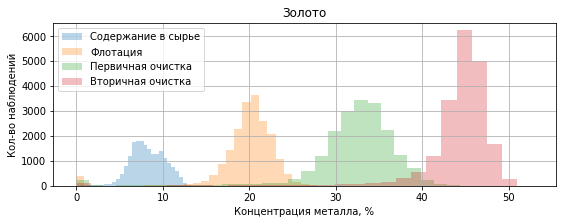

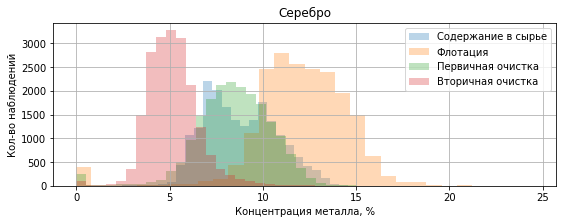

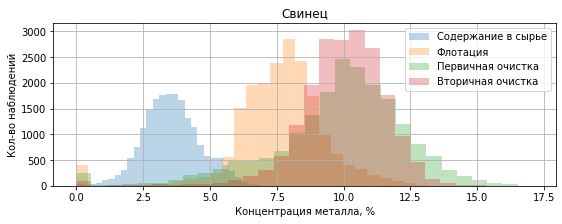

In [18]:
# Отобразим графики:

draw_concentration_hist(au_data, 'Золото')
draw_concentration_hist(ag_data, 'Серебро')
draw_concentration_hist(pb_data, 'Свинец')

**Замечены аномальные выбросы в промежутке 0...1 во всех данных.**

Поскольку даже визуально очевидно, что доля аномалий не является значительной частью выборки, удалим из генеральной и тестовой выборок данные, где концентрация равна 0:

In [19]:
# Создадим функцию, удаляющую данные из выборки:

def zero_concentration_remover(data):
    origianl_shape = data.shape[0]

    for material in ['au', 'ag', 'pb', 'sol']:
        data = data[(data[f'rougher.output.concentrate_{material}'] != 0)]
        data = data[(data[f'final.output.concentrate_{material}'] != 0)]
    
    print(f'Из выборки удалено {origianl_shape-data.shape[0]} строк из {origianl_shape} ({round((100-(data.shape[0]/origianl_shape)*100), 2)} %).')
    return data

In [20]:
# Очистим от аномальных значений обучающую выборку:
train_data = zero_concentration_remover(train_data)

Из выборки удалено 357 строк из 14149 (2.52 %).


In [21]:
# И генеральную:
full_data = zero_concentration_remover(full_data)

Из выборки удалено 493 строк из 19439 (2.54 %).


**Выводы:**
1. Содержание **золота** в сырье на каждом следующем этапе очистки **увеличивается**;
2. Содержание **серебра** увеличивается на этапе флотации, но значительно **уменьшается на этапах очистки**; 
1. Содержание **свинца** увеличивается на этапе флотации, но **практически не изменяется на обоих этапах очистки**;
1. Генеральная и обучающая **выборки избавлены от аномальных значений**.

### Размеры гранул сырья

Для сравнения распределения размеров гранул сырья в обучающей и гененральной выборках выведем на экран соответствующие гистограммы:

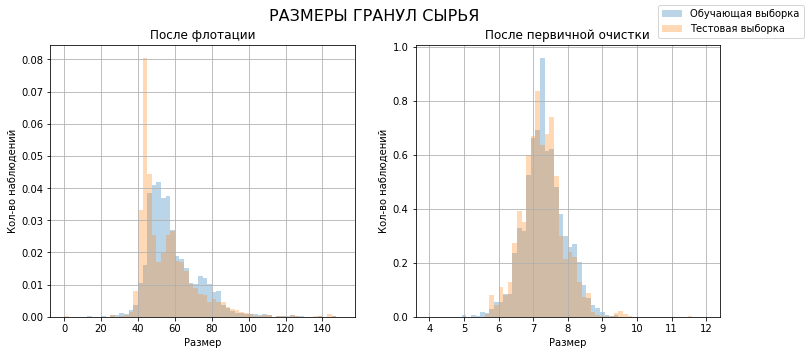

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(train_data["rougher.input.feed_size"], density=True, alpha=.3, bins=60, range=(0, 150))
axes[0].hist(test_data["rougher.input.feed_size"], density=True, alpha=.3, bins=60, range=(0, 150))
axes[0].set(title="После флотации", xlabel="Размер", ylabel="Кол-во наблюдений")
axes[0].grid(True)

axes[1].hist(train_data["primary_cleaner.input.feed_size"], density=True, alpha=.3, bins=60, range=(4, 12))
axes[1].hist(test_data["primary_cleaner.input.feed_size"], density=True, alpha=.3, bins=60, range=(4, 12))
axes[1].set(title="После первичной очистки", xlabel="Размер", ylabel="Кол-во наблюдений")
axes[1].grid(True)

fig.suptitle("РАЗМЕРЫ ГРАНУЛ СЫРЬЯ", fontsize=16)
fig.legend(["Обучающая выборка", "Тестовая выборка"])
fig.show()

**Распределение гранул между выборками незначительно отличается** и не должно существенно сказаться на результатах анализа.

### Суммарная концентрация веществ

Для отображения суммарной концентрации всех веществ на разных стадиях очистки сырья мы создадим 3 переменные для каждой стадии очистки (сырьё, после флотации и в готовом проудкте) и на их основе построим гистограммы.

In [23]:
def draw_concentration_sum_hist(data):
    fig, ax = plt.subplots(figsize=(9, 3))
    ax.legend(list(data))
    ax.set_xlabel('Концентрация веществ, %')
    ax.set_ylabel('Кол-во наблюдений')
    ax.set_title('Суммарная концентрация по стадиям')
    
    for column in data:
        data[column].hist(alpha=.3, bins=30) 
        ax.legend(['Содержание в сырье','Флотация','Первичная очистка', 'Вторичная очистка'])

In [24]:
input_sum = 0
output_sum = 0
final_sum = 0

for material in ['au', 'ag', 'pb', 'sol']:
    input_sum += full_data[f'rougher.input.feed_{material}']
    output_sum += full_data[f'rougher.output.concentrate_{material}']
    final_sum += full_data[f'final.output.concentrate_{material}']

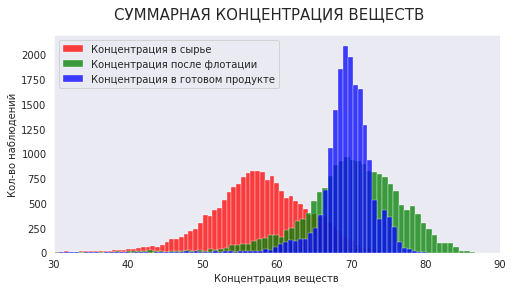

In [25]:
plt.figure(figsize=[8, 4])
sbn.set_style("dark")
sbn.histplot(input_sum, color='r', label='Концентрация в сырье', bins=120)
sbn.histplot(output_sum, color='g', label='Концентрация после флотации', bins=120)
sbn.histplot(final_sum, color='b', label='Концентрация в готовом продукте', bins=120)
plt.xlim(30, 90)
plt.suptitle('СУММАРНАЯ КОНЦЕНТРАЦИЯ ВЕЩЕСТВ', fontsize=15)
plt.xlabel('Концентрация веществ')
plt.ylabel('Кол-во наблюдений')
plt.legend()
plt.show();

**Суммарная концентрация веществ после флотации увеличивается, а в готовом продукте, прошедшим все этапы очистки, диапазон распределения значительно меньше.**

**В ходе анализа данных:**
- доказано, что флотация первостепенно удаляет неметаллические включения в сырье;
- последующие этапы очистки значительно влияют как на увеличение содержания золота в готовом продукте, так и снижают диапазон распределения суммарной концентрации веществ;
- распределение размеров гранул сырья между обучающей и тестовой выборок незначительно;
- обнаружены и устранены аномальные значения.

## Определение наилучшей модели
### sMAPE и подготовка данных 

С помощью make_scorer из sklearn.metrics вызовем фукнцию, подбироающего параметры модели:

In [26]:
def smape (target, predictions):
    return (sum(abs(target-predictions) / ((abs(target) + abs(predictions)) / 2)) / len(target)) * 100

smape_scorer = make_scorer(smape, greater_is_better = False)

In [27]:
def final_smape (rougher, final):
    return round(abs((pd.Series(0.25 * rougher + 0.75 * final).mean())), 2)

In [28]:
# Избавимся от столбцов, которые есть в обучающей выборке, но отсутствуют в тестовой, 
# т.к. для модели эти данные не имеют ценности.
train_data = train_data.loc[:, list(test_data.columns)]

# Целевые показатели будут представлены в 2 столбцах: 
# по содержанию элементов после флотации и в готовом продукте. 
features_train = train_data.drop(["rougher.output.recovery", "final.output.recovery"], axis=1)
target_train = train_data[["rougher.output.recovery", "final.output.recovery"]] 

features_test = test_data.drop(["rougher.output.recovery", "final.output.recovery"], axis=1)
target_test = test_data[["rougher.output.recovery", "final.output.recovery"]]

# Посредством StandartScaler масштабируем данные:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

# Создадим переменную state для адекватной работы моделей:
state = np.random.RandomState(0)

Подготовим данные для обучения модели:

Данные подготовлены, переходим к обучению моделей.

### Модель "Линейная регрессия"

In [29]:
model = LinearRegression()

regr_cv_rough = cross_val_score(model, 
                                features_train, 
                                target_train.iloc[:, 0], 
                                scoring=smape_scorer, 
                                cv=5,
                                ) 

regr_cv_final = cross_val_score(model, 
                                features_train, 
                                target_train.iloc[:, 1], 
                                scoring=smape_scorer, 
                                cv=5,
                                ) 

print('Средняя оценка качества модели "Линейная регрессия":', final_smape(regr_cv_rough, regr_cv_final))

Средняя оценка качества модели "Линейная регрессия": 10.06


### Модель "Решающее древо"
Посредством кросс-валидации GridSearchCV из sklearn.model_selection определим диапазон, в котором находятся наилучшие гиперпараметры для обучения модели.

In [30]:
# Матрица гиперпараметров
global_params = {"max_depth": range(1, 51, 10),
                "min_samples_leaf": [1, 0.5, 3],
                }

dt_gb = GridSearchCV(estimator = DecisionTreeRegressor(random_state = state),
                    param_grid = global_params, 
                    scoring = smape_scorer,
                    cv = 5, 
                    n_jobs = -1)

dt_gb_diap_rough = dt_gb.fit(features_train, target_train.iloc[:, 0])
dt_gb_diap_final = dt_gb.fit(features_train, target_train.iloc[:, 1])
dt_final_smape = final_smape(dt_gb_diap_rough.best_score_, dt_gb_diap_final.best_score_)

print("Лучшие параметры модели для целевых показателей после флоатции: {}".format(dt_gb_diap_rough.best_params_))
print("Лучшие параметры модели для целевых показателей в готовом продукте: {}".format(dt_gb_diap_final.best_params_))
print("Оценка sMAPE при указанных парметрах: {}".format(abs(round((dt_final_smape), 2))))

Лучшие параметры модели для целевых показателей после флоатции: {'max_depth': 1, 'min_samples_leaf': 1}
Лучшие параметры модели для целевых показателей в готовом продукте: {'max_depth': 1, 'min_samples_leaf': 1}
Оценка sMAPE при указанных парметрах: 9.8


In [31]:
# Повторим поиск гиперпараметров в диапазоне 1...10 с шагом 1:
global_params = {"max_depth": range(1, 11, 1),
                "min_samples_leaf": [1, 0.5, 3],
                }

dt_gb = GridSearchCV(estimator = DecisionTreeRegressor(random_state = state),
                    param_grid = global_params, 
                    scoring = smape_scorer,
                    cv = 5, 
                    n_jobs = -1)

dt_gb_diap_rough = dt_gb.fit(features_train, target_train.iloc[:, 0])
dt_gb_diap_final = dt_gb.fit(features_train, target_train.iloc[:, 1])
dt_final_smape = final_smape(dt_gb_diap_rough.best_score_, dt_gb_diap_final.best_score_)

print("Лучшие параметры модели для целевых показателей после флоатции: {}".format(dt_gb_diap_rough.best_params_))
print("Лучшие параметры модели для целевых показателей в готовом продукте: {}".format(dt_gb_diap_final.best_params_))
print("Оценка sMAPE при указанных парметрах: {}".format(abs(round((dt_final_smape), 2))))

Лучшие параметры модели для целевых показателей после флоатции: {'max_depth': 2, 'min_samples_leaf': 1}
Лучшие параметры модели для целевых показателей в готовом продукте: {'max_depth': 2, 'min_samples_leaf': 1}
Оценка sMAPE при указанных парметрах: 9.38


Наличушими параметрами оказались `'max_depth': 2` и `'min_samples_leaf': 1`. Оценка sMAPE при этом оказалась 9.38.

### Модель "Случайный лес"
Подобно алгоритму, проводимому с моделью "Решающее древо", найдём наилучшие гиперпараметры модели, а потом оценим её sMAPE^

In [40]:
# Матрица гиперпараметров
global_params = {"max_depth": range(1, 31, 10),
                'n_estimators': range (1, 51, 10),
                }

rf_gb = GridSearchCV(RandomForestRegressor(random_state = state), 
                     global_params,
                     scoring = smape_scorer,
                     cv = 5, 
                     n_jobs = -1)
rf_gb_diap_rough = rf_gb.fit(features_train, target_train.iloc[:, 0])
rf_gb_diap_final = rf_gb.fit(features_train, target_train.iloc[:, 1])
rf_final_smape = final_smape(dt_gb_diap_rough.best_score_, dt_gb_diap_final.best_score_)

print("Лучшие параметры модели для целевых показателей после флоатции: {}".format(rf_gb_diap_rough.best_params_))
print("Лучшие параметры модели для целевых показателей в готовом продукте: {}".format(rf_gb_diap_final.best_params_))
print("Оценка sMAPE при указанных парметрах: {}".format(abs(round((rf_final_smape), 2))))

Лучшие параметры модели для целевых показателей после флоатции: {'max_depth': 11, 'n_estimators': 21}
Лучшие параметры модели для целевых показателей в готовом продукте: {'max_depth': 11, 'n_estimators': 21}
Оценка sMAPE при указанных парметрах: 9.38


In [48]:
# Матрица гиперпараметров
global_params = {"max_depth": range(11, 21, 3),
                'n_estimators': range (21, 31, 3),
                }

rf_gb = GridSearchCV(RandomForestRegressor(random_state = state), 
                     global_params,
                     scoring = smape_scorer,
                     cv = 3, 
                     n_jobs = -1)
rf_gb_diap_rough = rf_gb.fit(features_train, target_train.iloc[:, 0])
rf_gb_diap_final = rf_gb.fit(features_train, target_train.iloc[:, 1])
rf_final_smape = final_smape(dt_gb_diap_rough.best_score_, dt_gb_diap_final.best_score_)

print("Лучшие параметры модели для целевых показателей после флоатции: {}".format(rf_gb_diap_rough.best_params_))
print("Лучшие параметры модели для целевых показателей в готовом продукте: {}".format(rf_gb_diap_final.best_params_))
print("Оценка sMAPE при указанных парметрах: {}".format(abs(round((rf_final_smape), 2))))

Лучшие параметры модели для целевых показателей после флоатции: {'max_depth': 14, 'n_estimators': 27}
Лучшие параметры модели для целевых показателей в готовом продукте: {'max_depth': 14, 'n_estimators': 27}
Оценка sMAPE при указанных парметрах: 9.38


**Выбранные модели показали следующие результаты метрики sMAPE:**
- Линейная регрессия - 10.06;
- Решающее древо -  9.38;
- Случайный лес - 9.38.

Для поверки на тестовой выборке и построении прогнозов **используем модели "Случайный лес" и "Решающее древо"**.

## Проверка модели и оценка прогнозов
### Проверка модели на тестовой выборке

In [57]:
model = RandomForestRegressor(random_state = state, max_depth=14, n_estimators=27)

model.fit(features_train, target_train)
predictions = model.predict(features_test)

test_smape = final_smape(smape(target_test.iloc[:,0], predictions[:,0]), 
                         smape(target_test.iloc[:,1], predictions[:,1]))

print('Средняя оценка sMAPE для модели "Случайный лес" на тестовой выборке составила:', test_smape)

Средняя оценка sMAPE для модели "Случайный лес" на тестовой выборке составила: 10.12


In [58]:
model = DecisionTreeRegressor(random_state = state, max_depth=2, min_samples_leaf=1)

model.fit(features_train, target_train)
predictions = model.predict(features_test)

test_smape = final_smape(smape(target_test.iloc[:,0], predictions[:,0]), 
                         smape(target_test.iloc[:,1], predictions[:,1]))

print('Средняя оценка sMAPE для модели "Решающее древо" на тестовой выборке составила:', test_smape)

Средняя оценка sMAPE для модели "Решающее древо" на тестовой выборке составила: 9.66


### Проверка адекваности на константной модели
Вычислим метрику sMAPЕ для константной модели, созданной с помощью метода DummyRegressor:

In [50]:
model = DummyRegressor(strategy = "mean")

model.fit(features_train, target_train)
predictions = model.predict(features_test)

test_smape = final_smape(smape(target_test.iloc[:,0], predictions[:,0]),
                         smape(target_test.iloc[:,1], predictions[:,1]))

print('Средняя оценка sMAPE для константной модели составила:', test_smape)

Средняя оценка sMAPE для константной модели составила: 9.82


Показатель sMAPE модели "Решающее древо" ниже константной. **Выбранная модель адекватна** и её предсказания близки к целевым показателям.

## Выводы

1. В ходе подготовки данных:
    - была изучена общая информация по всем имеющимся выборкам;
    - пропуски в выборках были заполнены на основании предыдщуего показателя;
    - проверена корректность расчёта эффективности обогащения.


2. В ходе анализа данных:
    - доказано, что флотация первостепенно удаляет неметаллические включения в сырье;
    - последующие этапы очистки значительно влияют как на увеличение содержания золота в готовом продукте, так и снижают диапазон распределения суммарной концентрации веществ;
    - распределение размеров гранул сырья между обучающей и тестовой выборок незначительно;
    - обнаружены и устранены аномальные значения.
    

3. Из трёх моделей выбранных для прогнозирования, наиболее приемлимой согласно оценке sMAPE оказалась "Случайный лес":
    - sMAPE модели на обучающей выборке составил 8.43;
    - sMAPE модели на тестовой выборке составил 9.28;
    - sMAPE на константной выборке составил 9.66;